 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_df = pd.read_csv("Resources\\whale_returns.csv")

# Convert the 'Date' column to datetime format and set it as the index
whale_returns_df['Date'] = pd.to_datetime(whale_returns_df['Date'])
whale_returns_df.set_index('Date', inplace=True)

# Display the first few rows to verify
print(whale_returns_df.head())


            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  


In [3]:
# Count nulls
# Count null values
null_counts = whale_returns_df.isnull().sum()

# Display the null counts
print(null_counts)


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [4]:
# Drop nulls
# Drop rows with null values
whale_returns_df = whale_returns_df.dropna()

# Display the first few rows of the cleaned DataFrame
print(whale_returns_df.head())



            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652  


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv("Resources\\algo_returns.csv")

# Convert the 'Date' column to datetime format and set it as the index
algo_returns_df['Date'] = pd.to_datetime(algo_returns_df['Date'])
algo_returns_df.set_index('Date', inplace=True)

# Display the first few rows to verify
print(algo_returns_df.head())

              Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN


In [6]:
# Count nulls
null_counts = algo_returns_df.isnull().sum()

# Display the null counts
print(null_counts)

Algo 1    0
Algo 2    6
dtype: int64


In [7]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()

# Display the first few rows of the cleaned DataFrame
print(algo_returns_df.head())

              Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_closed_df = pd.read_csv("Resources\\sp500_history.csv")

# Convert the 'Date' column to datetime format and set it as the index
sp500_closed_df['Date'] = pd.to_datetime(sp500_closed_df['Date'],format='%d-%b-%y')
sp500_closed_df.set_index('Date', inplace=True)

# Remove non-numeric characters and convert the 'Close' column to numeric
sp500_closed_df['Close'] = sp500_closed_df['Close'].str.replace('$', '').astype(float)

# Display the first few rows to verify
print(sp500_closed_df.head())

# Display the first few rows to verify
print(sp500_closed_df.head())

              Close
Date               
2019-04-23  2933.68
2019-04-22  2907.97
2019-04-18  2905.03
2019-04-17  2900.45
2019-04-16  2907.06
              Close
Date               
2019-04-23  2933.68
2019-04-22  2907.97
2019-04-18  2905.03
2019-04-17  2900.45
2019-04-16  2907.06


In [9]:
# Check Data Types
print(sp500_closed_df.dtypes)


Close    float64
dtype: object


In [10]:
# Fix Data Types


In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_closed_df['Close'].pct_change()

# Display the first few rows to verify
print(sp500_daily_returns.head())

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
Name: Close, dtype: float64


In [12]:
# Drop nulls
# Drop rows with null values
sp500_daily_returns.dropna(inplace=True)

# Display the first few rows to verify
print(sp500_daily_returns.head())


Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
Name: Close, dtype: float64


In [13]:
# Rename `Close` Column to be specific to this portfolio.
# Rename the 'Close' column
sp500_closed_df.rename(columns={'Close': 'SP500_Close'}, inplace=True)

# Display the first few rows to verify
print(sp500_closed_df.head())


            SP500_Close
Date                   
2019-04-23      2933.68
2019-04-22      2907.97
2019-04-18      2905.03
2019-04-17      2900.45
2019-04-16      2907.06


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = whale_returns_df.join(algo_returns_df, how='outer').join(sp500_daily_returns, how='outer')

# Display the combined DataFrame
print(combined_df.head())

# Drop rows with NaN values
combined_df.dropna(inplace=True)

# Display the first few rows to verify
print(combined_df)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2012-10-01                        NaN                 NaN   
2012-10-02                        NaN                 NaN   
2012-10-03                        NaN                 NaN   
2012-10-04                        NaN                 NaN   
2012-10-05                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  Algo 1  \
Date                                                                      
2012-10-01                          NaN                     NaN     NaN   
2012-10-02                          NaN                     NaN     NaN   
2012-10-03                          NaN                     NaN     NaN   
2012-10-04                          NaN                     NaN     NaN   
2012-10-05                          NaN                     NaN     NaN   

            Algo 2     Close  
Date           

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

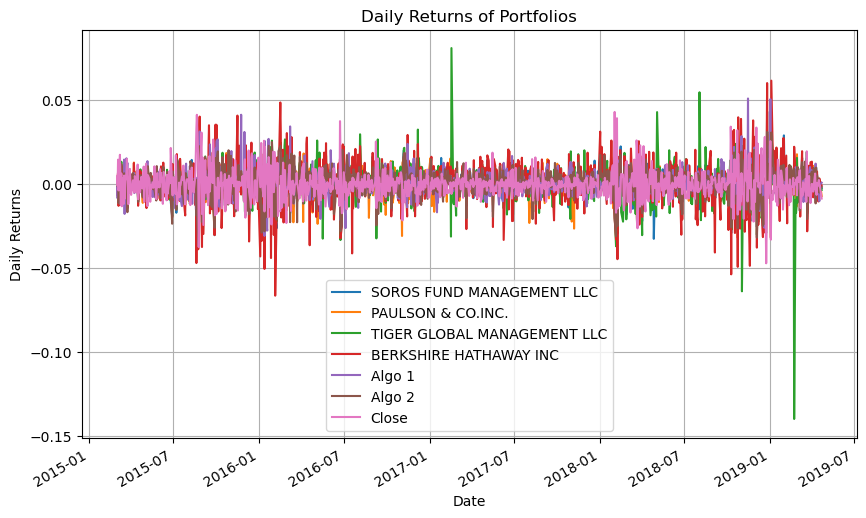

In [15]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(10, 6))
plt.title('Daily Returns of Portfolios')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.grid(True)
plt.legend()
plt.show()

#### Calculate and Plot cumulative returns.

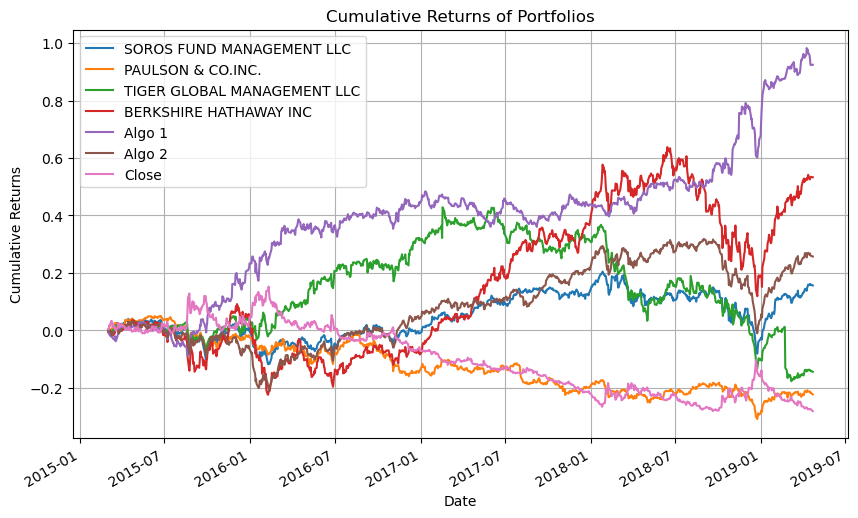

In [16]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_df).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(10, 6))
plt.title('Cumulative Returns of Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.legend()
plt.show()

# Plot cumulative returns


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


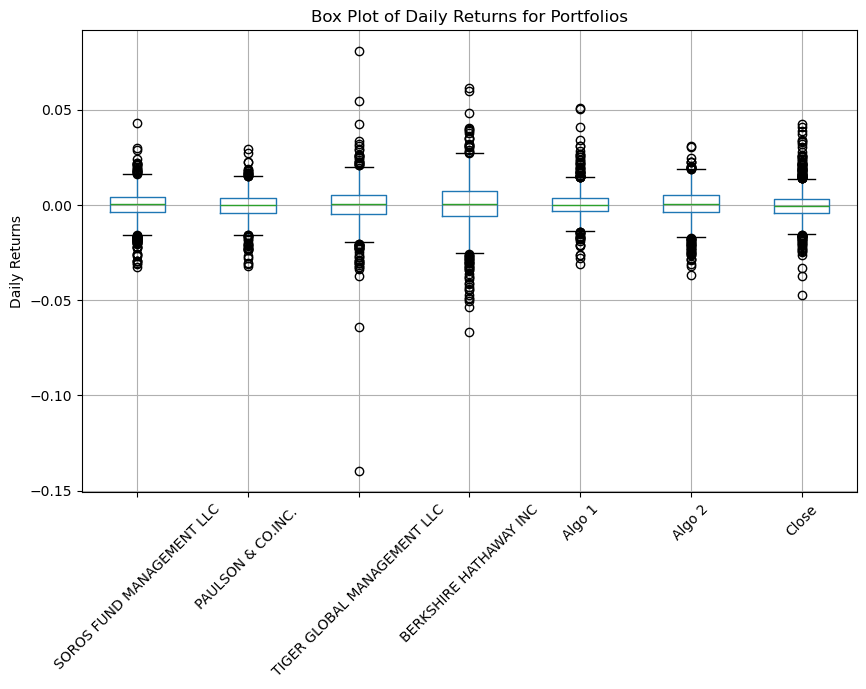

In [17]:
# Box plot to visually show risk
# Create a box plot for daily returns
plt.figure(figsize=(10, 6))
combined_df.boxplot(grid=True)
plt.title('Box Plot of Daily Returns for Portfolios')
plt.ylabel('Daily Returns')
plt.xticks(rotation=45)
plt.show()


### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()

# Display the daily standard deviations
print(daily_std)


SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
Close                          0.008587
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate the daily standard deviation of the S&P 500
sp500_daily_std = sp500_daily_returns.std()

# Display the daily standard deviation of the S&P 500
print("Daily Standard Deviation of S&P 500:", sp500_daily_std)

# Determine which portfolios are riskier than the S&P 500
riskier_portfolios = daily_std[daily_std > sp500_daily_std].index.tolist()

# Display the riskier portfolios
print("Portfolios riskier than the S&P 500:", riskier_portfolios)



Daily Standard Deviation of S&P 500: 0.008134642617809523
Portfolios riskier than the S&P 500: ['TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 2', 'Close']


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)

# Display the annualized standard deviation
print("Annualized Standard Deviation:")
print(annualized_std)


Annualized Standard Deviation:
SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
Close                          0.136313
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Figure size 1000x600 with 0 Axes>

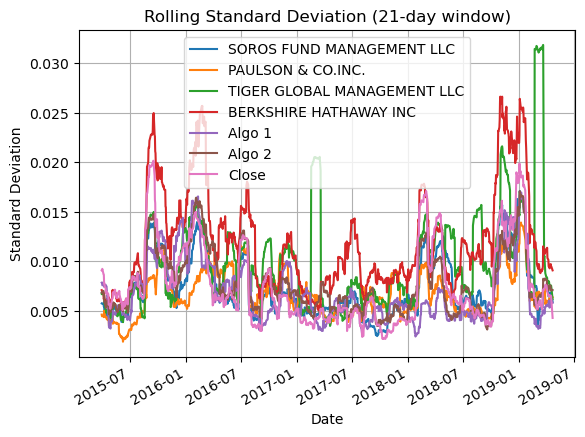

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
plt.figure(figsize=(10, 6))
rolling_std.plot()
plt.title('Rolling Standard Deviation (21-day window)')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.legend()
plt.show()



### Calculate and plot the correlation

In [22]:
# Calculate the correlation
correlation_matrix = combined_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699823   
PAULSON & CO.INC.                             0.699823            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561040            0.434308   
BERKSHIRE HATHAWAY INC                        0.754157            0.545451   
Algo 1                                        0.320901            0.268631   
Algo 2                                        0.826730            0.678085   
Close                                         0.000574            0.013549   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561040   
PAULSON & CO.INC.                               0.434308   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424125   
Algo 1                                          0.16411

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [23]:
# Calculate the covariance of a single portfolio with the S&P 500
portfolio_covariance = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['Close'])

# Calculate the variance of the S&P 500
sp500_variance = combined_df['Close'].var()

# Computing beta
beta = portfolio_covariance / sp500_variance

print("Covariance of the Portfolio with S&P 500:", portfolio_covariance)
print("Variance of S&P 500:", sp500_variance)
print("Beta:", beta)



Covariance of the Portfolio with S&P 500: 3.8897269830622025e-08
Variance of S&P 500: 7.373467552840441e-05
Beta: 0.0005275302230853086


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Figure size 1000x600 with 0 Axes>

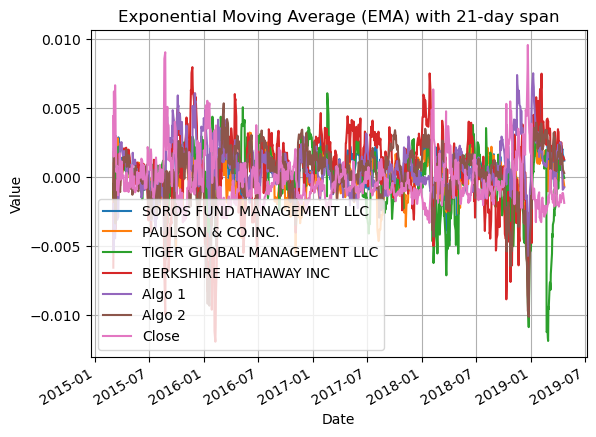

In [24]:
# Calculate the rolling window using Exponential Moving Average (EMA)
rolling_window = combined_df.ewm(span=21).mean()

# Plot the rolling window
plt.figure(figsize=(10, 6))
rolling_window.plot()
plt.title('Exponential Moving Average (EMA) with 21-day span')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()



---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Assuming risk-free rate of 0 for simplicity
risk_free_rate = 0

# Calculate the annualized Sharpe ratios
annualized_sharpe_ratios = np.sqrt(252) * (combined_df.mean() - risk_free_rate) / combined_df.std()

# Display the annualized Sharpe ratios
print("Annualized Sharpe Ratios:")
print(annualized_sharpe_ratios)



Annualized Sharpe Ratios:
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
Close                         -0.518582
dtype: float64


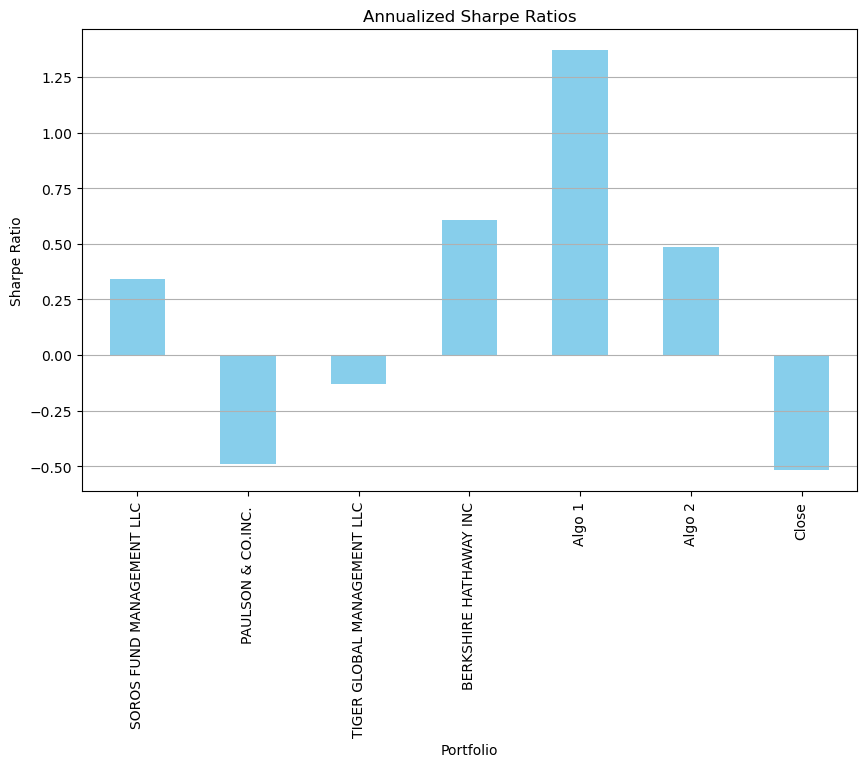

In [26]:
# Visualize the sharpe ratios as a bar plot
# Visualize the Sharpe ratios as a bar plot
plt.figure(figsize=(10, 6))
annualized_sharpe_ratios.plot(kind='bar', color='skyblue')
plt.title('Annualized Sharpe Ratios')
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.grid(axis='y')
plt.show()


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
appl_history_df = pd.read_csv("Resources\\aapl_historical.csv")
# Display the first few rows to verify
print(appl_history_df.head())

  Symbol Trade DATE    NOCP
0   AAPL   5/9/2019  200.72
1   AAPL   5/8/2019  202.90
2   AAPL   5/7/2019  202.86
3   AAPL   5/6/2019  208.48
4   AAPL   5/3/2019  211.75


In [28]:
# Reading data from 2nd stock
cost_history_df = pd.read_csv("Resources\\cost_historical.csv")
# Display the first few rows to verify
print(cost_history_df.head())

  Symbol Trade DATE    NOCP
0   COST   5/9/2019  243.47
1   COST   5/8/2019  241.34
2   COST   5/7/2019  240.18
3   COST   5/6/2019  244.23
4   COST   5/3/2019  244.62


In [29]:
# Reading data from 3rd stock
goog_history_df = pd.read_csv("Resources\\goog_historical.csv")
# Display the first few rows to verify
print(goog_history_df.head())

  Symbol Trade DATE     NOCP
0   GOOG   5/9/2019  1162.38
1   GOOG   5/8/2019  1166.27
2   GOOG   5/7/2019  1174.10
3   GOOG   5/6/2019  1189.39
4   GOOG   5/3/2019  1185.40


In [30]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([appl_history_df, cost_history_df, goog_history_df])


In [31]:
# Reset Date index
combined_df.reset_index(drop=True, inplace=True)
print (combined_df)

    Symbol Trade DATE     NOCP
0     AAPL   5/9/2019   200.72
1     AAPL   5/8/2019   202.90
2     AAPL   5/7/2019   202.86
3     AAPL   5/6/2019   208.48
4     AAPL   5/3/2019   211.75
..     ...        ...      ...
745   GOOG  5/17/2018  1078.59
746   GOOG  5/16/2018  1081.77
747   GOOG  5/15/2018  1079.23
748   GOOG  5/14/2018  1100.20
749   GOOG  5/11/2018  1098.26

[750 rows x 3 columns]


In [32]:
# Reorganize portfolio data by having a column per symbol
# Add a 'Symbol' column to each DataFrame
appl_history_df['Symbol'] = 'AAPL'
cost_history_df['Symbol'] = 'COST'
goog_history_df['Symbol'] = 'GOOG'

portfolio_df = combined_df.pivot_table(index='Trade DATE', columns='Symbol', values='NOCP')
portfolio_df.reset_index(inplace=True)
print(portfolio_df)


Symbol Trade DATE    AAPL    COST     GOOG
0       1/10/2019  153.80  210.64  1070.33
1       1/11/2019  152.29  210.51  1057.19
2       1/14/2019  150.00  209.00  1044.69
3       1/15/2019  153.07  211.03  1077.15
4       1/16/2019  154.94  210.18  1080.97
..            ...     ...     ...      ...
245     9/28/2018  225.74  234.88  1193.47
246      9/4/2018  228.36  234.68  1197.00
247      9/5/2018  226.87  235.61  1186.48
248      9/6/2018  223.10  236.68  1171.44
249      9/7/2018  221.30  241.46  1164.83

[250 rows x 4 columns]


In [33]:
# Calculate daily returns
daily_returns_df = portfolio_df.set_index('Trade DATE').pct_change()

# Drop NaN values
daily_returns_df.dropna(inplace=True)

# Display sample data
print(daily_returns_df.head())


Symbol          AAPL      COST      GOOG
Trade DATE                              
1/11/2019  -0.009818 -0.000617 -0.012277
1/14/2019  -0.015037 -0.007173 -0.011824
1/15/2019   0.020467  0.009713  0.031071
1/16/2019   0.012217 -0.004028  0.003546
1/17/2019   0.005938  0.006090  0.008261


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = daily_returns_df.dot(weights)

# Display sample data
print(portfolio_return.head())



Trade DATE
1/11/2019   -0.007571
1/14/2019   -0.011345
1/15/2019    0.020417
1/16/2019    0.003912
1/17/2019    0.006763
dtype: float64


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
# Assign a name to the portfolio return column
portfolio_return.name = 'Portfolio_Return'

# Join the portfolio return DataFrame to the original returns DataFrame
joined_returns_df = daily_returns_df.join(portfolio_return, rsuffix='_Portfolio')

# Display sample data
print(joined_returns_df)



                AAPL      COST      GOOG  Portfolio_Return
Trade DATE                                                
1/11/2019  -0.009818 -0.000617 -0.012277         -0.007571
1/14/2019  -0.015037 -0.007173 -0.011824         -0.011345
1/15/2019   0.020467  0.009713  0.031071          0.020417
1/16/2019   0.012217 -0.004028  0.003546          0.003912
1/17/2019   0.005938  0.006090  0.008261          0.006763
...              ...       ...       ...               ...
9/28/2018   0.003512  0.003761 -0.000979          0.002098
9/4/2018    0.011606 -0.000851  0.002958          0.004571
9/5/2018   -0.006525  0.003963 -0.008789         -0.003784
9/6/2018   -0.016617  0.004541 -0.012676         -0.008251
9/7/2018   -0.008068  0.020196 -0.005643          0.002162

[249 rows x 4 columns]


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# Assign a name to the portfolio return column
portfolio_return.name = 'Portfolio_Return'

# Drop NaN values from both DataFrames
daily_returns_df_cleaned = daily_returns_df.dropna()
portfolio_return_cleaned = portfolio_return[daily_returns_df_cleaned.index]

# Join the cleaned portfolio return DataFrame to the cleaned original returns DataFrame
joined_returns_df = daily_returns_df_cleaned.join(portfolio_return_cleaned, rsuffix='_Portfolio')

# Display sample data
print(joined_returns_df.head())


                AAPL      COST      GOOG  Portfolio_Return
Trade DATE                                                
1/11/2019  -0.009818 -0.000617 -0.012277         -0.007571
1/14/2019  -0.015037 -0.007173 -0.011824         -0.011345
1/15/2019   0.020467  0.009713  0.031071          0.020417
1/16/2019   0.012217 -0.004028  0.003546          0.003912
1/17/2019   0.005938  0.006090  0.008261          0.006763


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:

# Calculate the standard deviation of daily returns
std_daily_return = joined_returns_df.std()

# Annualize the standard deviation
trading_days_per_year = 252  # Assuming 252 trading days in a year
annualized_std = std_daily_return * (trading_days_per_year ** 0.5)

# Display annualized standard deviation
print(annualized_std)


AAPL                0.816421
COST                0.703888
GOOG                0.537231
Portfolio_Return    0.597862
dtype: float64


### Calculate and plot rolling `std` with 21-day window

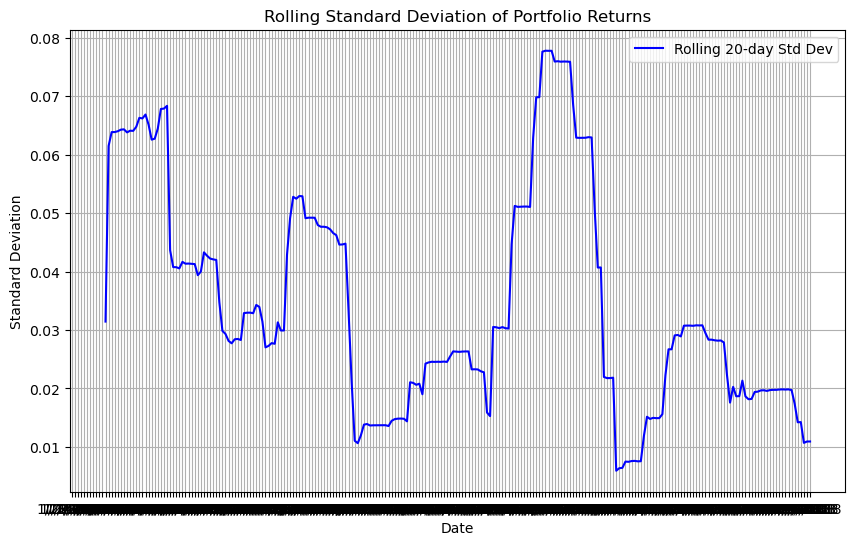

In [38]:
# Calculate rolling standard deviation
rolling_window = 20  # Adjust the window size as needed
rolling_std = joined_returns_df['Portfolio_Return'].rolling(window=rolling_window).std()

# Plot rolling standard deviation
plt.figure(figsize=(10, 6))
plt.plot(rolling_std, color='blue', label=f'Rolling {rolling_window}-day Std Dev')
plt.title('Rolling Standard Deviation of Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()



### Calculate and plot the correlation

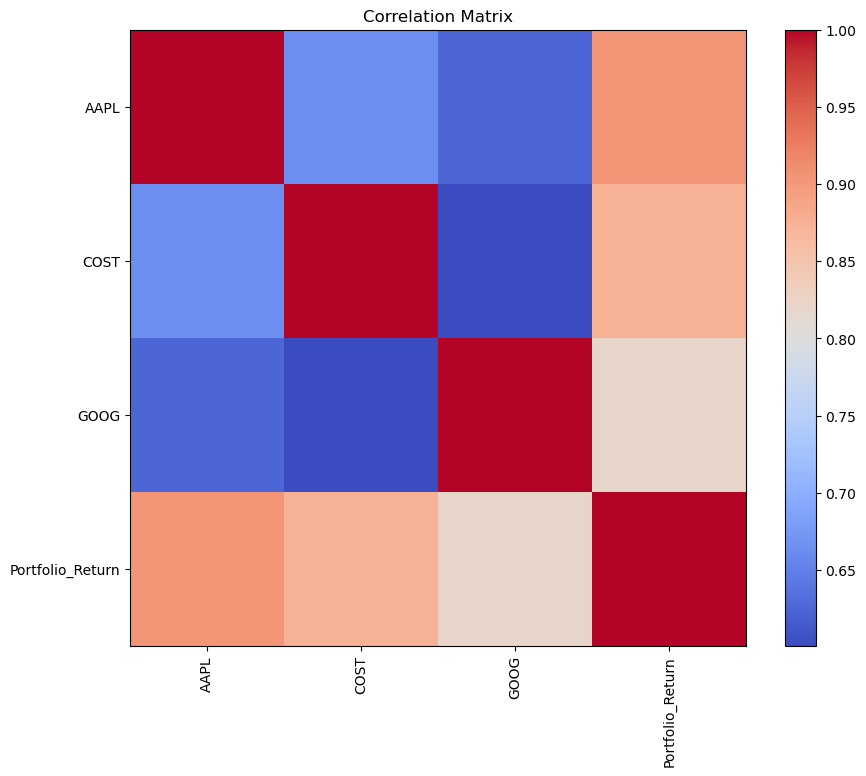

In [39]:
# Calculate correlation
correlation = joined_returns_df.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation='vertical')
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.show()


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

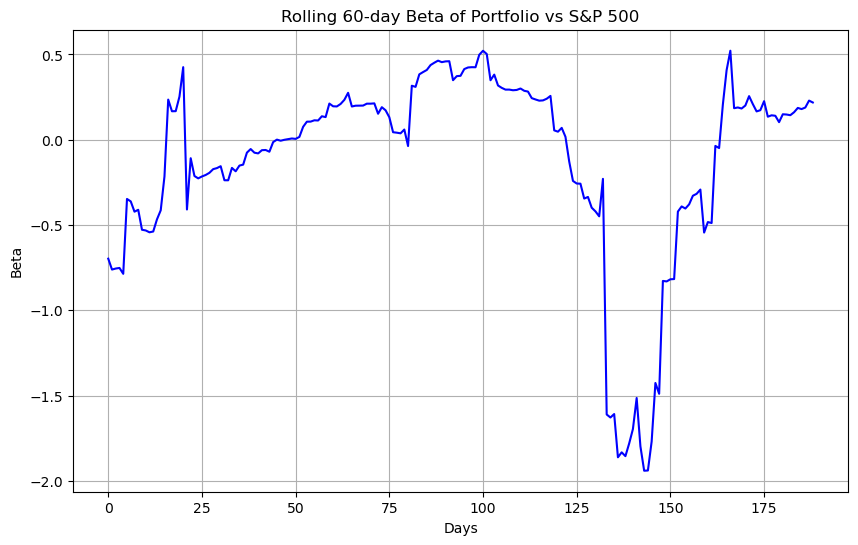

In [47]:
# Calculate and plot Beta
# Calculate the portfolio return with equal weights
daily_returns_df['Portfolio_Return'] = daily_returns_df.mean(axis=1)

# Calculate rolling beta
rolling_window = 60
rolling_betas = []

for i in range(len(daily_returns_df) - rolling_window):
    # Get the returns data for the rolling window
    portfolio_window = daily_returns_df['Portfolio_Return'].iloc[i:i+rolling_window]
    sp500_window = sp500_daily_returns.iloc[i:i+rolling_window]
    
    # Calculate beta using linear regression
    slope, intercept, _, _, _ = stats.linregress(sp500_window, portfolio_window)
    rolling_betas.append(slope)

# Plot rolling beta
plt.figure(figsize=(10, 6))
plt.plot(rolling_betas, color='blue')
plt.title('Rolling 60-day Beta of Portfolio vs S&P 500')
plt.xlabel('Days')
plt.ylabel('Beta')
plt.grid(True)
plt.show()


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Calculate Annualized Sharpe Ratios
# Define the risk-free rate (e.g., 1%)
rf_rate = 0.01

# Calculate excess returns
excess_returns = daily_returns_df.subtract(rf_rate, axis=0)

# Calculate average excess return
average_excess_return = excess_returns.mean()

# Calculate standard deviation of excess returns
std_dev_excess_return = excess_returns.std()

# Calculate Sharpe ratios
sharpe_ratios = average_excess_return / std_dev_excess_return

# Annualize Sharpe ratios
trading_days_per_year = 252
annualized_sharpe_ratios = sharpe_ratios * np.sqrt(trading_days_per_year)

# Display annualized Sharpe ratios
print(annualized_sharpe_ratios)



Symbol
AAPL               -2.261792
COST               -3.035412
GOOG               -4.266054
Portfolio_Return   -3.498589
dtype: float64


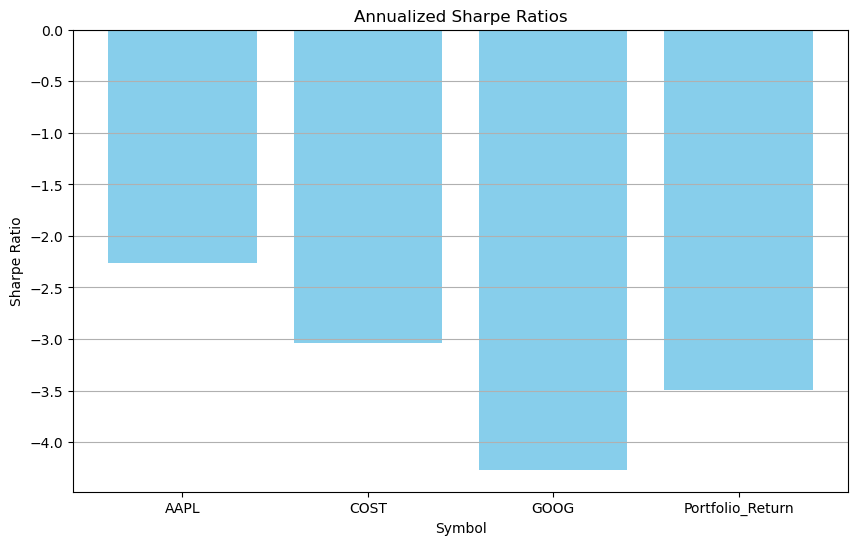

In [50]:
# Visualize the sharpe ratios as a bar plot
# Plot Sharpe ratios
plt.figure(figsize=(10, 6))
plt.bar(annualized_sharpe_ratios.index, annualized_sharpe_ratios.values, color='skyblue')
plt.title('Annualized Sharpe Ratios')
plt.xlabel('Symbol')
plt.ylabel('Sharpe Ratio')
plt.grid(axis='y')
plt.show()

### How does your portfolio do?

Write your answer here!

In [51]:
#The portfolio returns overall did better that the rf_rate of !%